# Reading data
with the **read_csv_url()** function wrote by *Chris*

the function of read_csv_url() is:
*   Load a CSV file from a remote URL into a pandas DataFrame
*   Clean column names using janitor(if loading fails, prints a failure message)

In [16]:
import pandas as pd

In [33]:
import file_reader as fr

url = "../01_Data/Raw/20250615-London-listings.csv/listings.csv"

df = fr.read_csv_url(url)
print("----------------------------------------------------------------------------")
print(f"The data is {df.shape[0]} rows * {df.shape[1]} columns")

Successfully loaded from URL: ../01_Data/Raw/20250615-London-listings.csv/listings.csv
Preview of first 5 rows:
       id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                             name  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

          

# Selecting the columns we want

In [37]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         96651 non-null  int64  
 1   listing_url                96651 non-null  object 
 2   last_scraped               96651 non-null  object 
 3   name                       96651 non-null  object 
 4   description                93806 non-null  object 
 5   host_id                    96651 non-null  int64  
 6   host_name                  96611 non-null  object 
 7   host_since                 96613 non-null  object 
 8   host_location              73323 non-null  object 
 9   host_about                 49314 non-null  object 
 10  host_is_superhost          94828 non-null  object 
 11  host_listings_count        96613 non-null  float64
 12  host_total_listings_count  96613 non-null  float64
 13  host_verifications         96613 non-null  obj

In [36]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_name', 'host_since', 
    'host_location', 'host_about', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 
    'host_verifications', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
    'amenities', 'price', 'minimum_nights', 'maximum_nights', 
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'license', 'reviews_per_month']
df = df[cols]

# Set to show ALL columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Prevent line wrapping

print(f"Cols contains {len(cols)} columns.")
df.sample(5, random_state = 1)

Cols contains 34 columns.


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
88047,1371159657488873429,https://www.airbnb.com/rooms/1371159657488873429,2025-06-13,Bespoke 2 bed 2bath apartment in South Kensington,Enjoy this centrally-located flatof 2 bed 2 ba...,681589009,Vasile,2025-02-28,NaN,NaN,f,11.0,11.0,"['email', 'phone']",51.493550,-0.184780,Entire rental unit,Entire home/apt,5,2.0,2 baths,2.0,2.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$416.00,5,365,49,0,NaN,NaN,NaN,NaN,NaN
10924,14559403,https://www.airbnb.com/rooms/14559403,2025-06-13,"Bright, Fresh & Modern Ensuite Room","Perfect for business travellers, solo adventur...",61939174,Melody,2016-03-07,"London, United Kingdom",My husband and I are working professionals in ...,f,1.0,2.0,"['email', 'phone']",51.493270,-0.324240,Private room in home,Private room,2,NaN,1 private bath,1.0,NaN,"[""Lockbox"", ""Self check-in"", ""Iron"", ""Hair dry...",NaN,1,40,0,178,2016-09-28,2020-03-15,4.94,NaN,1.68
48134,810774383603868550,https://www.airbnb.com/rooms/810774383603868550,2025-06-11,3 Bedroom Family Friendly home in East London,Welcome to our three bedroom family home!<br /...,371048030,Kate,2020-10-07,"England, United Kingdom",East London Family,f,1.0,1.0,"['email', 'phone']",51.568946,-0.022849,Entire home,Entire home/apt,6,2.5,2.5 baths,3.0,3.0,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",$160.00,2,14,19,12,2023-03-12,2023-09-24,4.83,NaN,0.44
65676,1109998846922231362,https://www.airbnb.com/rooms/1109998846922231362,2025-06-14,Peaceful Garden View Apt. close to Central London,Welcome to our clean and cosy flat nestled in ...,228031450,Aditya,2018-11-28,"London, United Kingdom","Design, entrepreneurship, living fully, exerci...",f,1.0,1.0,"['email', 'phone']",51.503374,-0.283565,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,NaN,"[""Cooking basics"", ""Washer"", ""Wine glasses"", ""...",NaN,1,12,30,5,2024-04-16,2024-10-03,4.60,NaN,0.35
62478,1059430992167095579,https://www.airbnb.com/rooms/1059430992167095579,2025-06-12,Room in artists flat in Hackney,Guest room in an artist's' flat in South Hackn...,20110902,Leah,2014-08-16,"London, United Kingdom","Artist living in Hackney, London",t,1.0,1.0,"['email', 'phone']",51.537340,-0.052940,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$67.00,2,14,187,55,2024-04-21,2025-06-01,4.91,NaN,3.95


# Counting nulls

### Counting Nulls by Column

In [38]:
df.isnull().sum(axis=0).sort_values(ascending=False)

license                      96651
host_about                   47337
beds                         33975
price                        33967
bathrooms                    33921
first_review                 25164
reviews_per_month            25164
review_scores_rating         25164
last_review                  25164
host_location                23328
bedrooms                     12580
description                   2845
host_is_superhost             1823
bathrooms_text                 149
host_name                       40
host_listings_count             38
host_total_listings_count       38
host_since                      38
host_verifications              38
id                               0
listing_url                      0
longitude                        0
last_scraped                     0
host_id                          0
name                             0
latitude                         0
room_type                        0
property_type                    0
accommodates        

In [39]:
# drop the columns which contain too many nans
df.drop(columns=['license','host_about'], inplace=True)

## Counting Nulls by Row

In [43]:
print(f"There are {df.shape[1]} Columns in total!")
df.isnull().sum(axis=1).sort_values(ascending=False)

There are 32 Columns in total!


5155    14
3646    14
4622    14
6122    14
5535    14
        ..
19       0
18       0
15       0
14       0
11       0
Length: 96651, dtype: int64

<class 'pandas.core.series.Series'>


<Axes: ylabel='Frequency'>

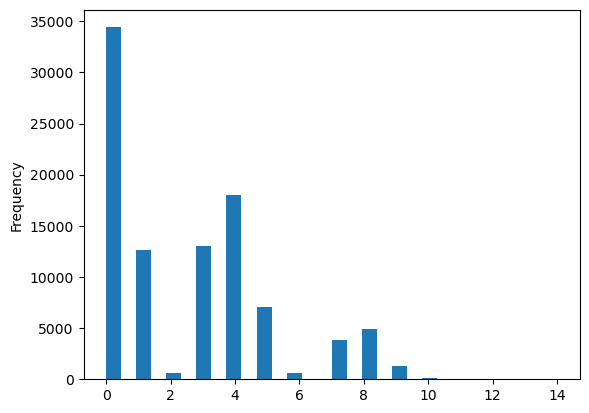

In [44]:
probs = df.isnull().sum(axis=1)
print(type(probs))       
probs.plot.hist(bins=30) 

In [45]:
# drop rows with more than 5 nans
print(f"df contains {df.shape[0]:,} rows.")
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {df.shape[0]:,} rows.")

df contains 96,651 rows.
df contains 85,816 rows.


set the path to store the raw data

In [30]:
from pathlib import Path
import numpy as np
import pandas as pd

In [31]:
path = Path(f'01 Data/Raw/{Path(url).name}') 
print(f"Writing to: {path}")

Writing to: 01 Data/Raw/listings.csv


# Fix data type

In [46]:
# boolean type data
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost


In [47]:
# date type data
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 



,last_scraped,host_since,first_review,last_review
73503,2025-06-12,2016-11-29,2024-10-20,2025-05-05
30837,2025-06-13,2011-05-11,2019-12-01,2020-03-08
50741,2025-06-12,2017-11-17,2023-05-13,2023-12-30
46926,2025-06-12,2021-07-30,2023-02-27,2025-05-25
37637,2025-06-13,2018-06-07,NaN,NaN


In [48]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [49]:
# categories type
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 



,property_type,room_type
61872,Entire home,Entire home/apt
3813,Private room in home,Private room
17706,Entire home,Entire home/apt
63429,Private room in rental unit,Private room
73215,Entire home,Entire home/apt


In [50]:
df[cats[0]].value_counts()

property_type
Entire rental unit             37143
Private room in rental unit    11610
Private room in home           10121
Entire condo                    8113
Entire home                     7848
                               ...  
Shared room                        1
Cave                               1
Lighthouse                         1
Private room in resort             1
Shared room in loft                1
Name: count, Length: 88, dtype: int64

In [51]:
df[cats[1]].value_counts()

room_type
Entire home/apt    57168
Private room       28367
Shared room          180
Hotel room           101
Name: count, dtype: int64

In [52]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [53]:
# strings type
money = ['price']
df.sample(5, random_state=42)[money]

,price
61872,NaN
3813,$43.00
17706,NaN
63429,$65.00
73215,NaN


In [55]:
for m in money:
    print(f"Converting {m}")
    try:
        df[m] = df[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')
    except ValueError as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price


In [56]:
df.sort_values(by='price', ascending=False).head(5)[['id','name','price','minimum_nights']]

,id,name,price,minimum_nights
10262,13841484,Bright & airy DoubleBed with EnSuite in Zone 2!,74100.0,2
56678,957005187369596707,Close To London Eye,65000.0,2
84270,1334032580590137938,Amazing Central Location (NBOL),58000.0,2
80103,1289793379859667497,Very Central Room - Walk to Eye,58000.0,2
82485,1311151886101957046,Walk To London Eye,58000.0,2


In [57]:
# int type
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365


In [59]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 85816 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         85816 non-null  int64         
 1   listing_url                85816 non-null  object        
 2   last_scraped               85816 non-null  datetime64[ns]
 3   name                       85816 non-null  object        
 4   description                84147 non-null  object        
 5   host_id                    85816 non-null  int64         
 6   host_name                  85814 non-null  object        
 7   host_since                 85816 non-null  datetime64[ns]
 8   host_location              65657 non-null  object        
 9   host_is_superhost          85816 non-null  bool          
 10  host_listings_count        85816 non-null  int64         
 11  host_total_listings_count  85816 non-null  int64         
 12  host_veri

Have a look...

In [60]:
df_cleaned = pd.read_csv("../01_Data/Cleaned/listings.csv")
df_cleaned.sample(5, random_state = 1)

,scrape_id,host_id,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bedrooms,price,availability_365,estimated_occupancy_l365d
88047,20250610032232,681589009,11.0,51.493550,-0.184780,Entire rental unit,Entire home/apt,5,2.0,416.0,49,0
10924,20250610032232,61939174,1.0,51.493270,-0.324240,Private room in home,Private room,2,1.0,NaN,0,0
48134,20250610032232,371048030,1.0,51.568946,-0.022849,Entire home,Entire home/apt,6,3.0,160.0,19,0
65676,20250610032232,228031450,1.0,51.503374,-0.283565,Entire condo,Entire home/apt,4,1.0,NaN,30,18
62478,20250610032232,20110902,1.0,51.537340,-0.052940,Private room in condo,Private room,2,1.0,67.0,187,255


# Saving

In [61]:
csv_out = Path(f'../01_Data/Cleaned/{path.name}')
pq_out = Path(f'../01_Data/Cleaned/{path.name.replace('.csv','.parquet')}')
if not csv_out.exists():
    print(f"Saving...")
    csv_out.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(csv_out, index=False, encoding='utf-8')
    df.to_parquet(pq_out, index=False)
    print(f"Saved {df.shape[0]:,} rows of {df.shape[1]:,} columns to {csv_out.resolve()}")
    print("Done.")

Saving...
Saved 85,816 rows of 32 columns to /home/jovyan/work/01_Data/Cleaned/listings.csv
Done.
